In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Development_sample_2.csv')

In [3]:
df.loc[df['FLAGBINARY']=='Good','y']=1
df.loc[df['FLAGBINARY']!='Good','y']=0

In [4]:
y = df.loc[:,df.columns=='y']
X = df.loc[:,(df.columns=='phone1')|(df.columns=='Married1')|(df.columns=='Married2')|(df.columns=='Age_d_2')|(df.columns=='Age_d_3')|(df.columns=='Age_d_4')|(df.columns=='Age_d_5')|(df.columns=='Age_d_6')|(df.columns=='Age_d_7')|(df.columns=='Age_d_8')]
X1 = df.loc[:,(df.columns=='PhoneWoe')|(df.columns=='MSwoe')|(df.columns=='AgeWoe')]

In [5]:
X1=sm.add_constant(X1)
model = sm.Logit(y,X1)

In [6]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.392311
         Iterations 6


In [7]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4996
Method:                           MLE   Df Model:                            3
Date:                Tue, 29 Mar 2022   Pseudo R-squ.:                 0.06962
Time:                        08:51:51   Log-Likelihood:                -1961.6
converged:                       True   LL-Null:                       -2108.3
Covariance Type:            nonrobust   LLR p-value:                 2.460e-63
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7393      0.042     41.473      0.000       1.657       1.822
PhoneWoe       1.0504      0.149      7.029      0.000       0.758       1.343
MSwoe          0.2879      0.108      2.662      0.008       0.076       0.500
AgeWoe         0.8963      0.080     11.156      0.000       0.739       1.054
==============================================================================
"""

In [8]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.070     
Dependent Variable: y                AIC:              3931.1068 
Date:               2022-03-29 08:51 BIC:              3957.1755 
No. Observations:   5000             Log-Likelihood:   -1961.6   
Df Model:           3                LL-Null:          -2108.3   
Df Residuals:       4996             LLR p-value:      2.4604e-63
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
const        1.7393     0.0419   41.4729   0.0000   1.6571   1.8215
PhoneWoe     1.0504     0.1494    7.0293   0.0000   0.7575   1.3433
MSwoe        0.2879     0.1081    2.6621   0.0078   0.0759   0.4998
AgeWoe       0.8963     0.0803   11.1560   0.0000   0.7388   1.0537
=================================================================

"""

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=1, stratify=y)

In [11]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
pd.DataFrame(confusion_matrix(y_test, preds), columns=['Predicted Benign', "Predicted Malignant"], index=['Actual Benign', 'Actual Malignant'])

,Predicted Benign,Predicted Malignant
Actual Benign,4,183
Actual Malignant,5,1058


In [13]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 1058
False Positives: 183
True Negatives: 4
False Negatives: 5


In [22]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
probas = lr.predict_proba(X_test)[:, 1]

In [16]:
def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]

In [17]:
roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, probas)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

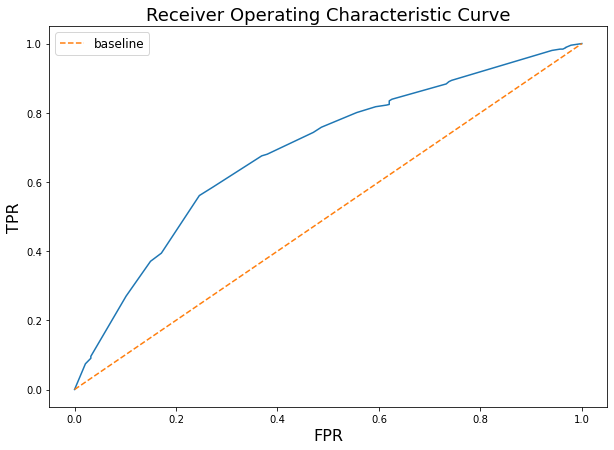

In [102]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

In [103]:
roc_auc_score(y_test, preds)


0.5

In [24]:
probas

array([0.89709657, 0.92719543, 0.95245438, ..., 0.80769033, 0.89709657,
       0.91705233])

In [20]:
X_train

,const,PhoneWoe,MSwoe,AgeWoe
4327,1.0,0.08,0.47,0.03
2454,1.0,0.08,0.47,0.23
1118,1.0,0.08,0.47,0.47
1932,1.0,0.08,-0.50,0.03
220,1.0,0.08,0.47,0.64
...,...,...,...,...
3501,1.0,0.08,0.47,0.03
3279,1.0,0.08,-0.50,-0.93
3184,1.0,0.08,0.47,0.23
2565,1.0,0.08,-0.06,0.23


In [21]:
X_test

,const,PhoneWoe,MSwoe,AgeWoe
4409,1.0,0.08,0.47,0.23
4275,1.0,0.08,0.47,0.64
6,1.0,0.08,0.47,1.13
3159,1.0,0.08,0.47,0.47
1727,1.0,0.08,-0.50,0.47
...,...,...,...,...
1500,1.0,0.08,0.47,0.23
363,1.0,0.08,-0.50,-0.69
3674,1.0,0.08,-0.50,-0.28
1366,1.0,0.08,0.47,0.23
